In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from simple_colors import*
from termcolor import colored

import time
import datatable as dt

import lightgbm as lgb

from numba import jit

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [72]:
start = time.time()
train = pd.read_csv(r"C:\Users\Ong Yi Kai\Desktop\Data\Kaggle competitions\Tabular Data Sept 2021\train.csv")
test = pd.read_csv(r"C:\Users\Ong Yi Kai\Desktop\Data\Kaggle competitions\Tabular Data Sept 2021\train.csv")
total_time = time.time()-start
print('DATA LOADED! Time Taken:.{:.2f}'.format(total_time))

DATA LOADED! Time Taken:.30.54


In [73]:
train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,86.489,0.59881,1.423200e+09,0.27240,9.455600,-0.050305,1938.300,8.6331,4.0607,26.8670,-1.180,10961.00,1.5397,135.3200,-1.49650,440.080,2.590100e+12,2.194200e+09,2968800.0,0.001431,13.3270,0.75050,18509.0,146820.0,-0.000276,1.090600e+16,1705.400,414.29,3.5392,1888.0,0.968930,18.3880,-0.001583,7.7059,5.9325,0.025693,4.5604,0.61122,10.7950,0.341930,0.235010,NaN,5237.70,1.29610,163.66,0.403780,0.188600,-0.001446,-0.35416,6.6432,0.30534,0.514020,1.907300e+09,29.861,0.965010,1797.2,72.178,108.6200,1.9799,1.2907,0.99519,1.3228,827.340,7.779900e+14,4.129900e+10,0.006994,6.9835,43956.0,1978.2,5.5084,-0.001081,6.1244,1.231800e+11,275.9200,5308500.0,1704.000,5.022400e+10,53.3980,-2.2012,6871.0,3.8862,-0.00558,5252.100,166.690,1.60740,0.66534,7768.900,0.99662,1.125700e+11,2.2432,0.934160,0.65056,94569.0,21.471,8214.100,0.288010,0.097826,0.001071,1.412400e+09,0.11093,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,9953.600,1.20930,3.334100e+09,0.28631,-0.012858,-0.019912,10.284,6.1872,1.0419,4.6404,31.877,123620.00,1.3951,125.8100,1.19890,136.450,9.098100e+09,4.004100e+10,1564000.0,0.000204,3.1074,1.50330,238000.0,21440.0,-0.001344,3.079400e+16,229.100,844.82,1.4680,4726.5,0.915380,-1.5321,0.982600,7.1112,2.0797,0.042321,4.2523,0.41871,5.4499,0.012737,0.386470,7.3082,283.21,-0.92552,140.80,0.247390,-0.001656,-0.000975,-0.22629,2.4246,0.77147,0.011613,1.803700e+09,64.604,0.262650,4455.0,78.339,745.5100,2.9069,1.4826,1.00510,1.4974,84.446,3.505600e+15,2.242300e+09,0.896300,4.6749,17713.0,9003.1,-4.3546,0.254100,6.9191,1.832400e+11,9.6510,32800.0,1480.600,2.300600e+10,44.0510,205.6900,4295.3,13.3880,0.46843,754.610,83.233,1.18900,29.55000,7343.700,0.99815,4.877700e+13,1.2708,-0.000969,5.29520,6779.0,227.720,34.342,0.340300,0.143370,0.049276,1.903200e+09,0.97673,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,15827.000,0.38164,1.230300e+09,0.25807,2.455600,NaN,26.873,7.5463,1.9967,1.9526,817.760,-2948.70,2.0054,1.6826,1.19680,74.624,-3.273900e+10,5.718900e+10,11058.0,-0.003097,8.0241,1.13180,27940.0,862460.0,-0.002207,5.849100e+13,-897.840,NaN,1.3561,3063.4,0.086232,16.1060,0.001481,11.4760,5.3430,0.012162,4.1018,-0.88270,8.1228,-0.676690,0.337700,-1.0732,4097.00,13.45800,159.24,0.322300,0.560090,0.000455,-0.16083,3.5753,0.60970,0.028301,5.271300e+08,14.454,0.115490,14605.0,36.992,-9.6391,64.2670,NaN,0.99278,2.5891,430.400,-4.453500e+13,5.144900e+12,0.099591,6.5516,1887.5,43319.0,4.3931,0.260260,6.1052,1.013300e+11,357.2700,1476600.0,90.845,1.306200e+09,2.3731,391.3700,2965.3,NaN,0.49459,43.524,138.520,1.10790,0.91948,47.915,NaN,1.510500e+12,3.4663,0.560950,4.13090,95531.0,39.486,-83.148,0.084881,0.032222,0.001668,1.436500e+07,0.20102,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,-36.837,1.10960,1.223100e+09,0.30944,10.370000,-0.106260,533.840,7.8490,1.0379,8.0030,12.349,-195.28,2.5598,92.1420,0.63789,1054.900,-1.204100e+10,5.187300e+12,1475400.0,1.036500,1.1903,0.98941,301200.0,NaN,-0.000007,-9.299200e+13,-10.818,1020.30,2.9553,3342.5,-0.000372,17.0110,0.095268,5.7448,15.8830,0.037934,4.4860,-0.88909,8.4384,-1.189800,0.001391,NaN,175.81,67.

In [74]:
numerical_features = [col for col in train.columns if col not in ('id','claim')]

In [75]:
def data_desc(data):
    print("*************************")
    print("General data info")
    print("*************************")
    print(data.info())
    print('\n')
    
    print("*************************")
    print("Shape")
    print("*************************")
    print('Number of data points:{} \nNumber of features:{}'.format(data.shape[0], data.shape[1]-1))
    print('\n')

    print("*************************")
    print("Presence of Null Values")
    print("*************************")
    if data.isnull().sum().sum()==0:
        print('NO Null values found')
    else:
        print('Null Values Found')
        print('{} Null entries'.format(data.isnull().sum().sum()))
        df_num_null = data.isnull().sum()
        pct_null = (df_num_null/data.shape[0])*100
        print('percentage null is:')
        print(pct_null)
    print('\n')
    
    print("*************************")
    print("Numerical Features")
    print("*************************")
    print(data.describe())
              

In [76]:
data_desc(train)

*************************
General data info
*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957919 entries, 0 to 957918
Columns: 120 entries, id to claim
dtypes: float64(118), int64(2)
memory usage: 877.0 MB
None


*************************
Shape
*************************
Number of data points:957919 
Number of features:119


*************************
Presence of Null Values
*************************
Null Values Found
1820782 Null entries
percentage null is:
id       0.000000
f1       1.591679
f2       1.585729
f3       1.617151
f4       1.624354
f5       1.608174
f6       1.620283
f7       1.618508
f8       1.604833
f9       1.591888
f10      1.589174
f11      1.610261
f12      1.627799
f13      1.614333
f14      1.589070
f15      1.619030
f16      1.612245
f17      1.610470
f18      1.599822
f19      1.615377
f20      1.613393
f21      1.613289
f22      1.594916
f23      1.603058
f24      1.631662
f25      1.618717
f26      1.603267
f27      1.612245
f28  

NUMERICAL FEATURE ANALYSIS

In [80]:
train.mean(skipna=True)
for col in numerical_features:
    train[col].replace(np.nan,train[col].mean(skipna=True),inplace=True)

outlier detection

In [86]:
def box_plot(data, features, titleText, hue=None):

    L = len(features)
    nrow = int(np.ceil(L/4))
    ncol = 5
    remove_last = (nrow * ncol) - L

    fig, axs = plt.subplots(nrow, ncol, figsize=(30, 150))
    fig.tight_layout()
    fig.set_facecolor('#e4e4e4')

    while remove_last > 0:
      axs.flat[-remove_last].set_visible(False)
      remove_last = remove_last - 1

    fig.subplots_adjust(top = 0.97)
    plt.subplots_adjust(left=0.1,
                    bottom=0.01, 
                    right=0.9,  
                    wspace=0.4, 
                    hspace=0.4)
    
    i = 1
    for feature in features:
        plt.subplot(nrow, ncol, i)
        v0 = sns.color_palette(palette = "pastel").as_hex()[2]
        ax = sns.boxplot(x = data[feature], color=v0, saturation=.75)   
        plt.xlabel(feature, fontsize=14, fontweight = 'bold')
        plt.ylabel('Values', fontsize=14, fontweight = 'bold')
        i += 1

    plt.suptitle(titleText, fontsize = 28, fontweight = 'bold', color = 'navy')
    plt.show()

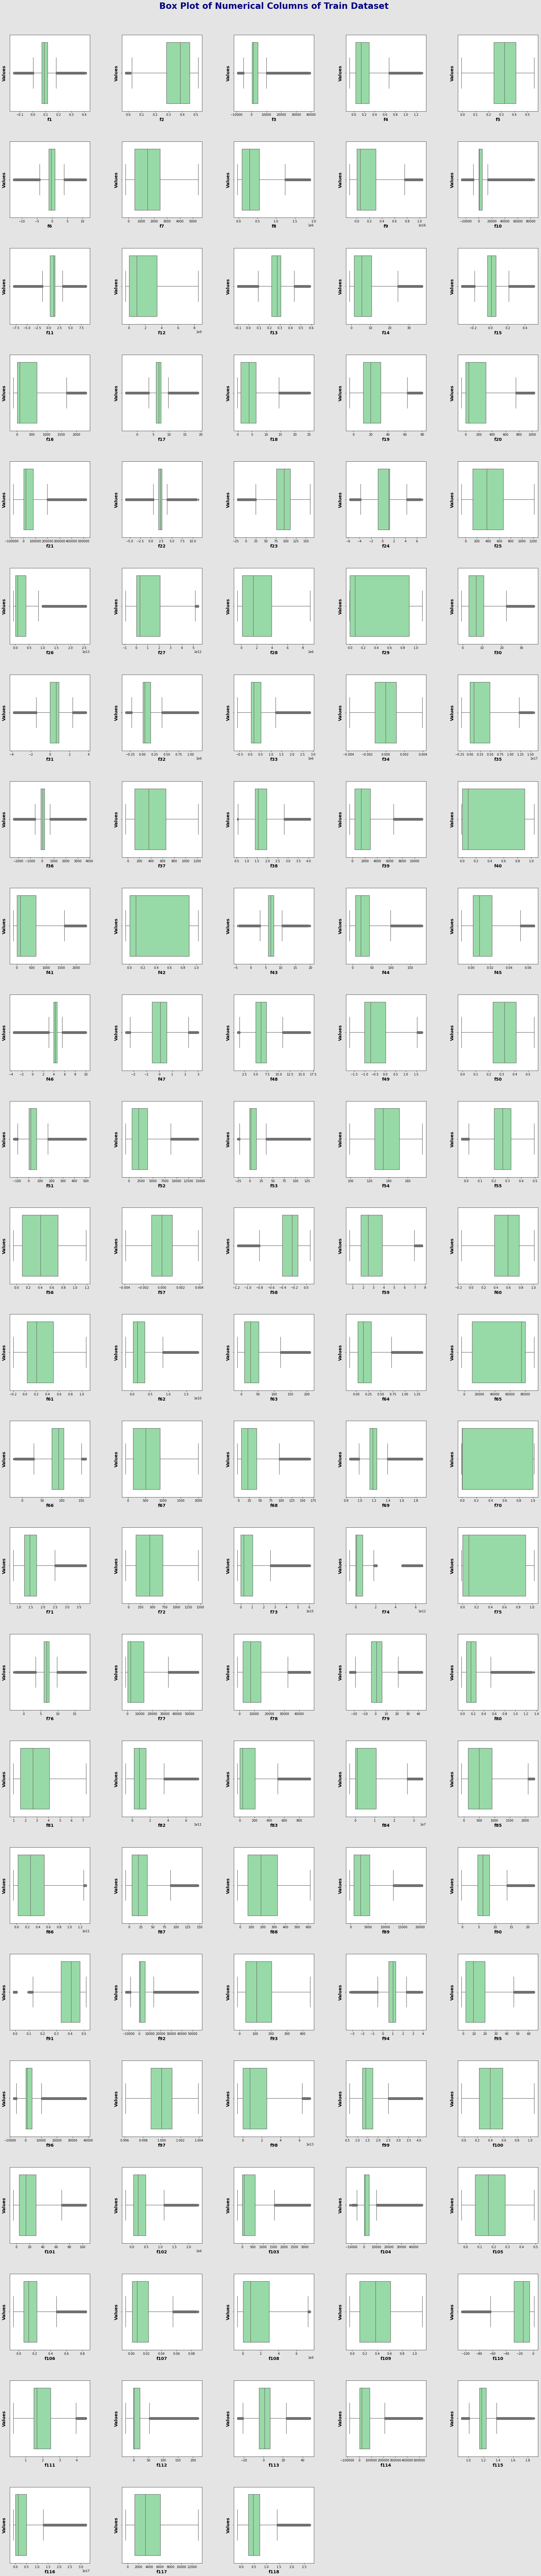

In [87]:
box_plot(train, numerical_features, 'Box Plot of Numerical Columns of Train Dataset')

In [91]:
def hist_plot(data, features, titleText, hue=None):

    L = len(features)
    nrow = int(np.ceil(L/4))
    ncol = 5
    remove_last = (nrow * ncol) - L

    fig, axs = plt.subplots(nrow, ncol, figsize=(30, 150))
    fig.tight_layout()
    fig.set_facecolor('#e4e4e4')
    
    while remove_last > 0:
      axs.flat[-remove_last].set_visible(False)
      remove_last -= 1

    fig.subplots_adjust(top = 0.97)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9,  
                    wspace=0.4, 
                    hspace=0.4)
    
    
    for i,feature in enumerate(features):
        plt.subplot(nrow, ncol, i+1)
        ax = sns.histplot(data=data[feature], edgecolor="black", color="darkseagreen", alpha=0.7)     
        plt.xlabel(feature, fontsize=18, fontweight = 'bold')
        plt.ylabel('Frequency', fontsize=18, fontweight = 'bold')

    plt.suptitle(titleText, fontsize = 32, fontweight = 'bold', color = 'navy')
    plt.show()

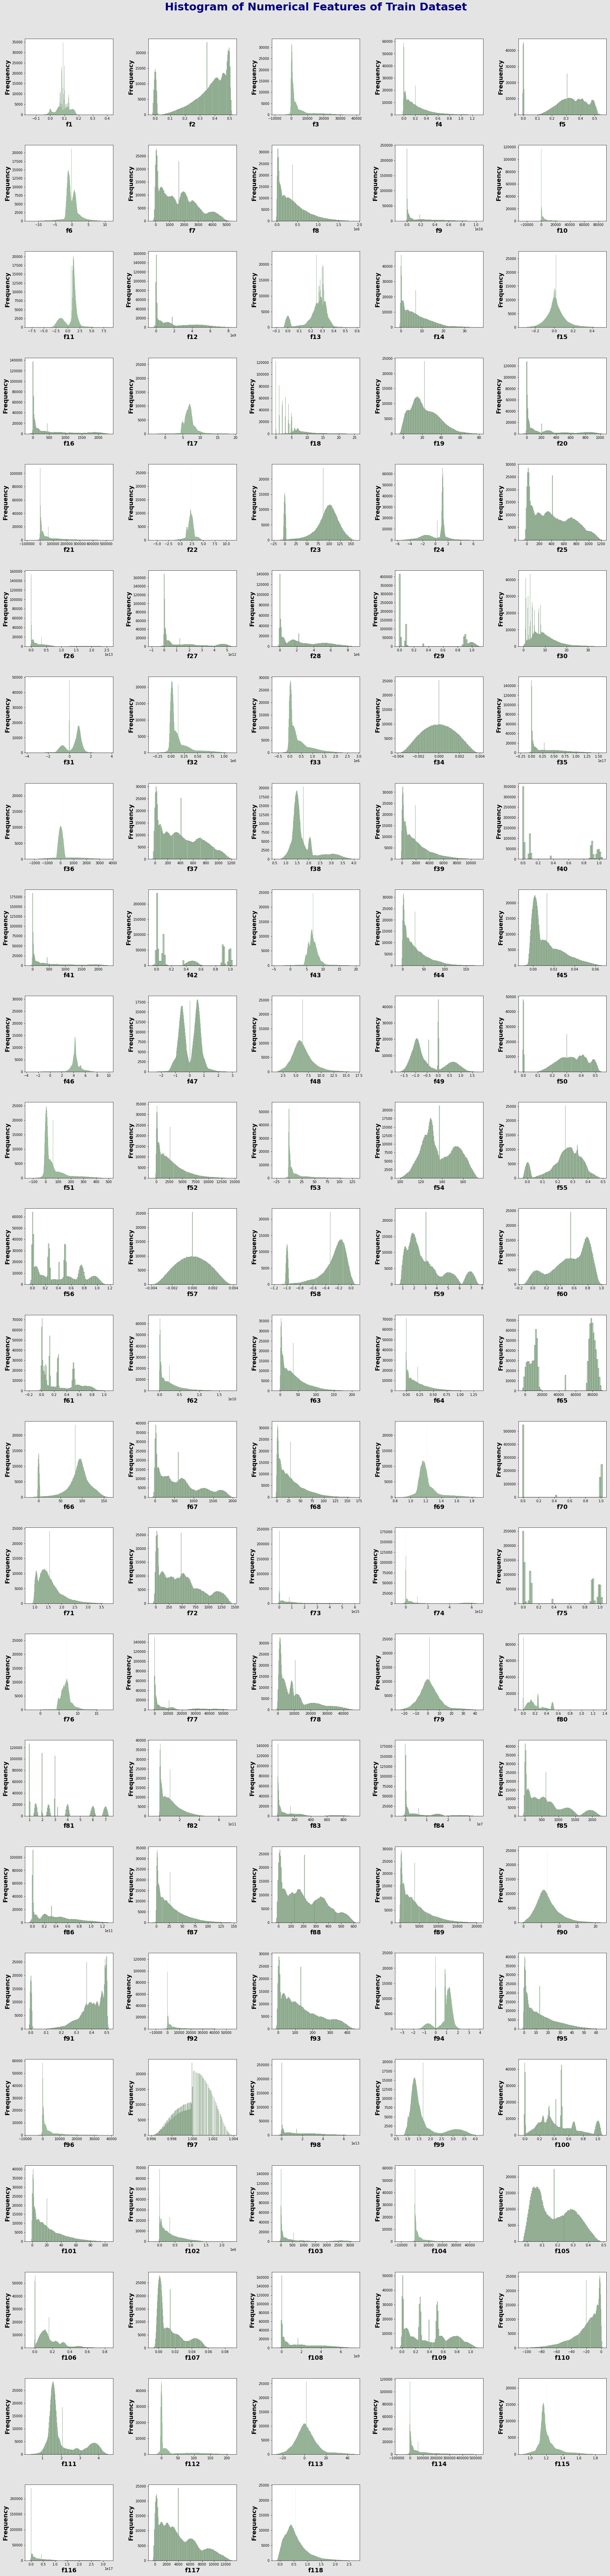

In [92]:
hist_plot(train, numerical_features, titleText='Histogram of Numerical Features of Train Dataset', hue=None)

In [88]:
def kde_plot(data, features, titleText, hue=None):

    L = len(features)
    nrow = int(np.ceil(L/4))
    ncol = 5
    remove_last = (nrow * ncol) - L

    fig, axs = plt.subplots(nrow, ncol, figsize=(30, 150))
    fig.tight_layout()
    fig.set_facecolor('#e4e4e4')

    while remove_last > 0:
      axs.flat[-remove_last].set_visible(False)
      remove_last -= 1

    fig.subplots_adjust(top = 0.97)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9,  
                    wspace=0.4, 
                    hspace=0.4)
    i = 1
    for feature in features:
        plt.subplot(nrow, ncol, i)
        ax = sns.kdeplot(data[feature], color="m", shade=True, label="%.3f"%(data[feature].skew()))  
        ax = ax.legend(loc = "best")    
        plt.xlabel(feature, fontsize=14, fontweight = 'bold')
        plt.ylabel('Density', fontsize=14, fontweight = 'bold')
        i += 1

    plt.suptitle(titleText, fontsize = 28, fontweight = 'bold', color = 'navy')
    
    plt.show()

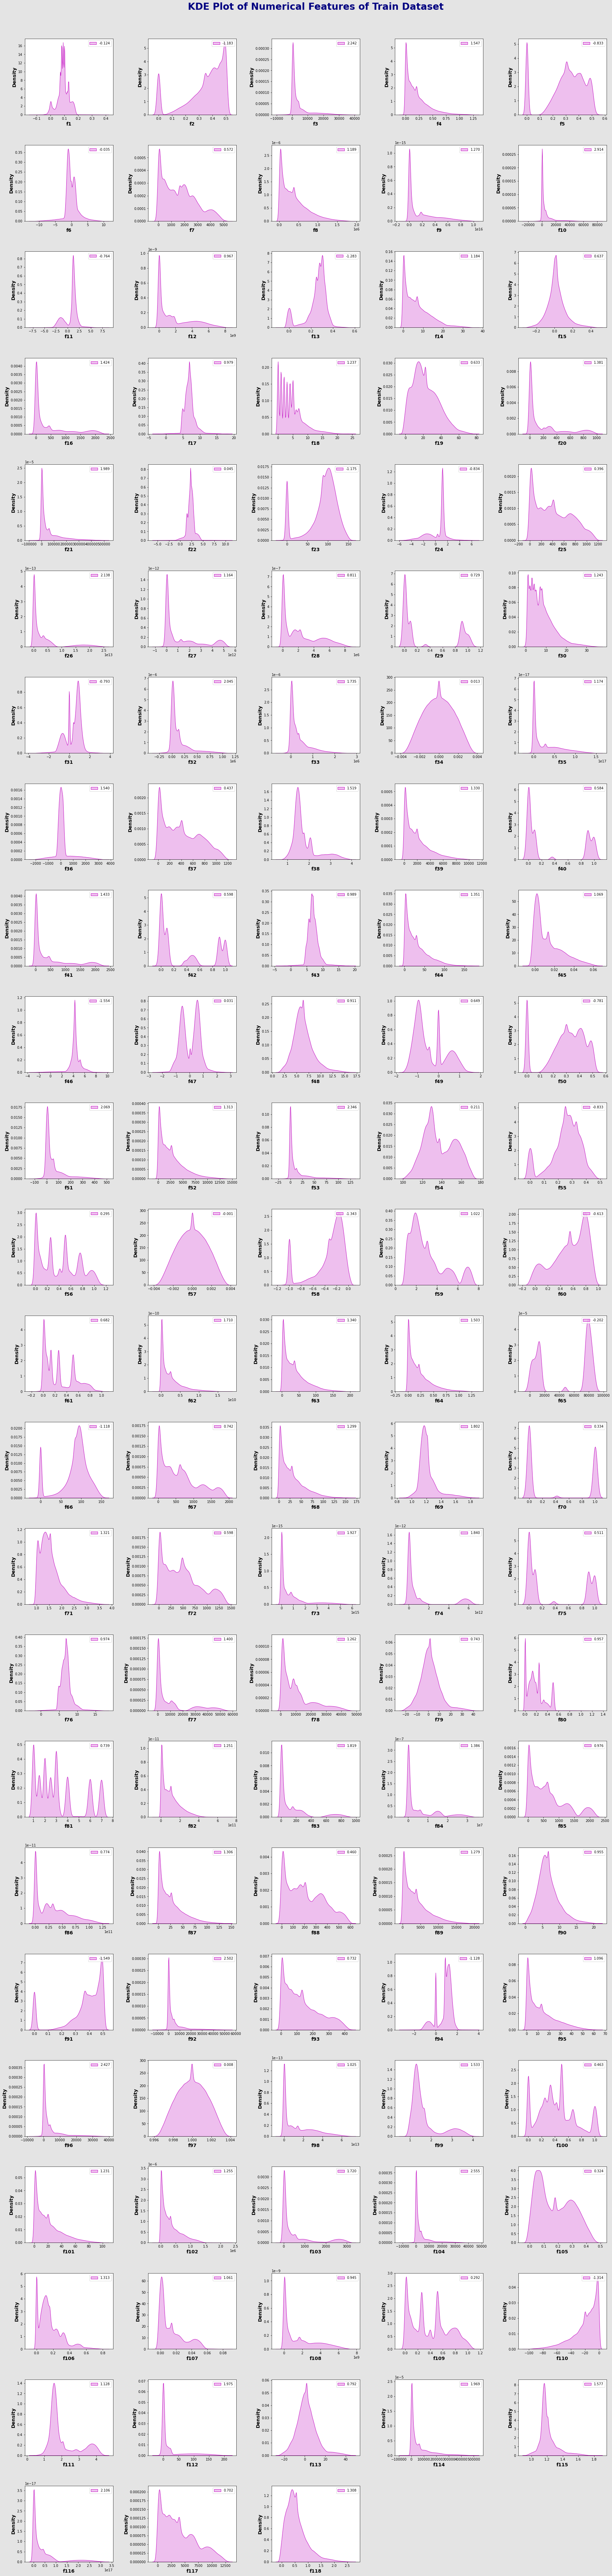

In [89]:
kde_plot(train, numerical_features, titleText = 'KDE Plot of Numerical Features of Train Dataset', hue = None)